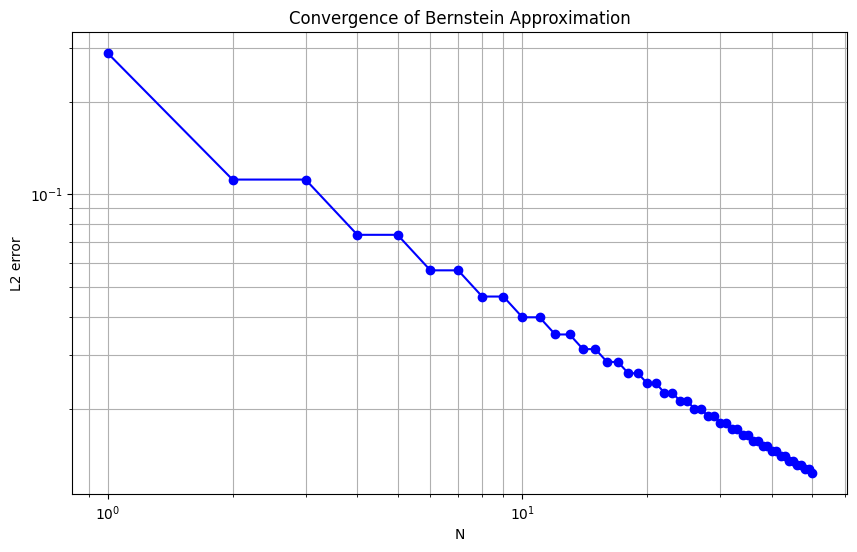

Estimated rate of convergence:  0.7519478915428939


In [3]:
# Import libraries
import sympy as sp
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Defining the function
def f(x):
    if 0 <= x <= 1/2:
        return x
    elif 1/2 < x <= 1:
        return 1-x

# Vectorize the function
f = np.vectorize(f)

# Define the symbolic variable
x = sp.symbols('x')

# Define the Bernstein basis polynomials
def bernstein_poly(i, n):
    return sp.binomial(n, i) * (x**i) * ((1-x)**(n-i))

# Define the Bernstein approximation
def bernstein_approximation(f, n):
    return sum(f(k/n) * bernstein_poly(k, n) for k in range(n+1))

# Evaluate the rate of convergence
N_values = range(1, 51)  # Values of n to use
errors = []  # To store the L^2 errors

for N in N_values:
    # Create a symbolic x variable
    x = sp.symbols('x')
    # Generate the Bernstein approximation symbolically
    Bnf = bernstein_approximation(f, N)
    # Convert it to a numerical function
    Bnf_num = sp.lambdify(x, Bnf, "numpy")
    
    # Compute the ^L2 error between the function and its Bernstein approximation
    # The lambda function is the integrand, and the integral is computed from 0 to 1
    # The result is the square root of the integral
    error = np.sqrt(spi.quad(lambda x: (f(x) - Bnf_num(x))**2, 0, 1)[0])
    
    # Store the L^2 error/Append the error to the list of errors
    errors.append(error)

# Plot the rate of convergence
# This is a log-log plot of the L2 error against the degree of the Bernstein polynomial
plt.figure(figsize=(10, 6))
plt.loglog(N_values, errors, 'bo-')
plt.xlabel('N')
plt.ylabel('L2 error')
plt.title('Convergence of Bernstein Approximation')
plt.grid(which='both')
plt.show()

# Calculate the slope of the line in the log-log plot
log_N_values = np.log(N_values)
log_errors = np.log(errors)

slope, _ = np.polyfit(log_N_values, log_errors, 1)

# The rate of convergence is the negative of the slope
rate_of_convergence = -slope
print("Estimated rate of convergence: ", rate_of_convergence)
